<a href="https://colab.research.google.com/github/katherine2022Udea/TesisEspecializacion/blob/main/3_1)Modelaci%C3%B3nBasePCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-02-ESTADISTICA/master/init.py
import init; init.init(force_download=False); 
from IPython.display import Image

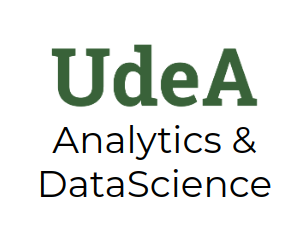

In [2]:
Image("local/imgs/udea-datascience.png")

### **Titulo:**


1. Análisis de supervivencia del cáncer de mama utilizando modelos de aprendizaje automático con datos clínicos y perfiles de expresión génica

2 Analisis de Supervivencia del Cancer de mama utilizando Modelos de clasificacion
3. Prediccion de supervivencia del cancer de mama utilizando modelos de aprendizaje automático
4. Predicción de Supervivencia del Cancer de mama utilizando Modelos de clasificacion

## **A) Importar Base de Datos**

In [3]:
import numpy as np # Matemetias y Matrices
import pandas as pd # para BD
import matplotlib.pyplot as plt # Graficas
import seaborn as sns # Graficas estadisticas
from scipy.stats import shapiro # Pruebas Estadisticas
from scipy.stats import chi2_contingency # Pruebas de Independencia para Tablas de contingencia
from scipy import stats
### Modelación de Machine Learning
from sklearn.model_selection import train_test_split # Para dividir nuesntra BD en entrenamiento y Test
import statsmodels.api as sm
from scipy.stats import normaltest

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
url='https://raw.githubusercontent.com/katherine2022Udea/TesisEspecializacion/main/Base_PCA.csv'
df=pd.read_csv(url)

# **4) Modelación con Base PCA**

Los términos inferencia y predicción describen tareas en las que aprendemos de los datos de manera supervisada para encontrar un modelo que describa la relación entre las variables independientes y el resultado. Sin embargo, la inferencia y la predicción divergen cuando se trata del uso del modelo resultante:

*  Inferencia: use el modelo para aprender sobre el proceso de generación de datos.
* Predicción: utilice el modelo para predecir los resultados de nuevos puntos de datos

<img src="https://d33wubrfki0l68.cloudfront.net/478f2689f1b9903ce2feed61a1f5e9c9deb2bcc9/55b03/post/commentary/inference-vs-prediction_files/figure-html/unnamed-chunk-1-1.png" width=500>

**Flujos de trabajo para inferencia y predicción**

Los flujos de trabajo básicos para la inferencia y la predicción se describen en las siguientes secciones.

**Inferencia**
* Modelado: Razonar sobre el proceso de generación de datos y elegir el modelo estocástico que mejor se aproxime al proceso de generación de datos.
* Validación del modelo: evalúe la validez del modelo estocástico mediante análisis de residuos o pruebas de bondad de ajuste.
* Inferencia: utilice el modelo estocástico para comprender el proceso de generación de datos.

**Predicción**

* Modelado: considere varios modelos diferentes y diferentes configuraciones de parámetros.
* Selección de modelo: identifique el modelo con el mayor rendimiento predictivo utilizando conjuntos de validación / prueba; seleccione el modelo con el rendimiento más alto en el equipo de prueba.
* Predicción: aplique el modelo seleccionado en datos nuevos con la expectativa de que el modelo seleccionado también se generalice a los datos no vistos.

## **Selección de variables**

In [5]:
Y=df['overall_survival']
X=df.drop("overall_survival",axis=1)
X.shape

(1423, 650)

**División train y test**

Evaluar la capacidad predictiva de un modelo consiste en comprobar cómo de próximas son sus predicciones a los verdaderos valores de la variable respuesta. Para poder cuantificarlo de forma correcta, se necesita disponer de un conjunto de observaciones, de las que se conozca la variable respuesta, pero que el modelo no haya "visto", es decir, que no hayan participado en su ajuste. Con esta finalidad, se dividen los datos disponibles en un conjunto de entrenamiento y un conjunto de test.

Es importante verificar que la distribución de la variable respuesta es similar en el conjunto de entrenamiento y en el de test. Para asegurar que esto se cumple, la función train_test_split() de scikit-learn permite, en problemas de clasificación, identificar con el argumento stratify la variable en base a la cual hacer el reparto.

Este tipo de reparto estratificado asegura que el conjunto de entrenamiento y el de test sean similares en cuanto a la variable respuesta, sin embargo, no garantiza que ocurra lo mismo con los predictores.

In [6]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2,random_state=1214,stratify=Y)

In [7]:
y_train.value_counts()

1    641
0    497
Name: overall_survival, dtype: int64

In [8]:
y_test.value_counts()

1    160
0    125
Name: overall_survival, dtype: int64

In [9]:
print(x_train.shape)
print(x_test.shape)

(1138, 650)
(285, 650)


## **4.1) Árboles de decisión con Python:clasificación**

**¿Qué son los árboles de decisión?**

* El enfoque classification and regression tree (CART) fue desarrollado por Breiman et al. (1984).
* Son un tipo de algoritmos de aprendizaje supervisado (i.e., existe una variable objetivo predefinida).
* Principalmente usados en problemas de clasificación.
* Las variables de entrada y salida pueden ser categóricas o continuas.
* Divide el espacio de predictores (variables independientes) en regiones distintas y no sobrepuestas.

<img src="https://bookdown.org/content/2031/images/decision_tree_explanation.png" width=500>

Se divide la población o muestra en conjuntos homegéneos basados en la variable de entrada más significativa.
La construcción del árbol sigue un enfoque de división binaria recursiva (top-down greddy approach). Greedy -> analiza la mejor variable para ramificación sólo en el proceso de división actual

**Ventajas**

* Fácil de entender
* Util en exploración de datos:identificar importancia de variables a partir de cientos de variables.
* Menos limpieza de datos: outliers y valores faltantes no influencian el modelo (A un cierto grado)
* El tipo de datos no es una restricción
* Es un método no paramétrico (i.e., no hay suposición acerca del espacio de distribución y la estructura del clasificador)

**Desventajas**
* Sobreajuste
* Pérdida de información al categorizar variables continuas
* Precisión: métodos como SVM y clasificadores tipo ensamblador a menudo tienen tasas de error 30% más bajas que CART (Classification and Regression Trees)
* Inestabilidad: un pequeño cambio en los datos puede modificar ampliamente la estructura del árbol. Por lo tanto la interpretación no es tan directa como parece.

**¿Cómo decide un árbol donde ramificarse?**

* La decisión de hacer divisiones estratégicas afecta altamente la precisión del árbol.
* Los criterios de decisión son diferentes para árboles de clasificación y regresión.
* Existen varios algortmos para decidir la ramificación.
* La creación de subnodos incrementa la homogeneidad de los subnodos resultantes. Es decir, la pureza del nodo se incrementa respecto a la variable objetivo.
* Se prueba la división con todas las variables y se escoge la que produce subnodos más homogéneos.
* Algunos algoritmos más comunes para la selección: Indice Gini, Chi Cuadrado, Ganancia de la información y Reducción en la varianza

**Indice Gini**

“Si seleccionamos aletoriamente dos items de una población, entonces estos deben ser de la misma clase y la probabilidad de esto es 1 si la población es pura”.

Variable objetivo categórica: “Success” o “Failure”
Solo divisiones binarias
A mayor valor de índice Gini, mayor la homogeneidad
CART (Classification and Regression Tree) usa el método de Gini para la división binaria

**Cálculo de índice Gini**

* Calcular Gini para los subnodos usando la fórmula de la suma de los cuadrados de probabilidad para success y failure (p^2 + q^2).
* Calcular Gini para la división usando score Gini ponderado para cada nodo de la división

<img src="https://bookdown.org/content/2031/images/example_tree.png" width=500>


* Mujer	(0.2)^2 + (0.8)^2 = 0.68  , IX	(0.43)^2 +(0.57)^2 = 0.51
* Hombre	(0.65)^2 + (0.35)^2 = 0.55, 	X	(0.56)^2 +(0.44)^2 = 0.51
* Pond.	(10/30)0.68 + (20/30)0.55 = 0.59, 	Pond.	(14/30)0.51 + (16/30)0.51 = 0.51

In [10]:
#!pip install --upgrade scikit-learn

In [11]:
# Modelo
from sklearn.tree import DecisionTreeClassifier
# Graficos
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text

# Para optimizar Modelos, Fase validacion
from sklearn.model_selection import GridSearchCV
# evaluar modelos
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import  metrics
from sklearn.metrics import precision_recall_fscore_support as score

**Creamos la funcion o modelo**

In [12]:
Modelo1=DecisionTreeClassifier( max_depth=5,criterion = 'gini',random_state= 123) # profundidad hiperparametro a optimizar
Modelo1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=123)

**Grafico**

Profundidad del árbol: 5
Número de nodos terminales: 29


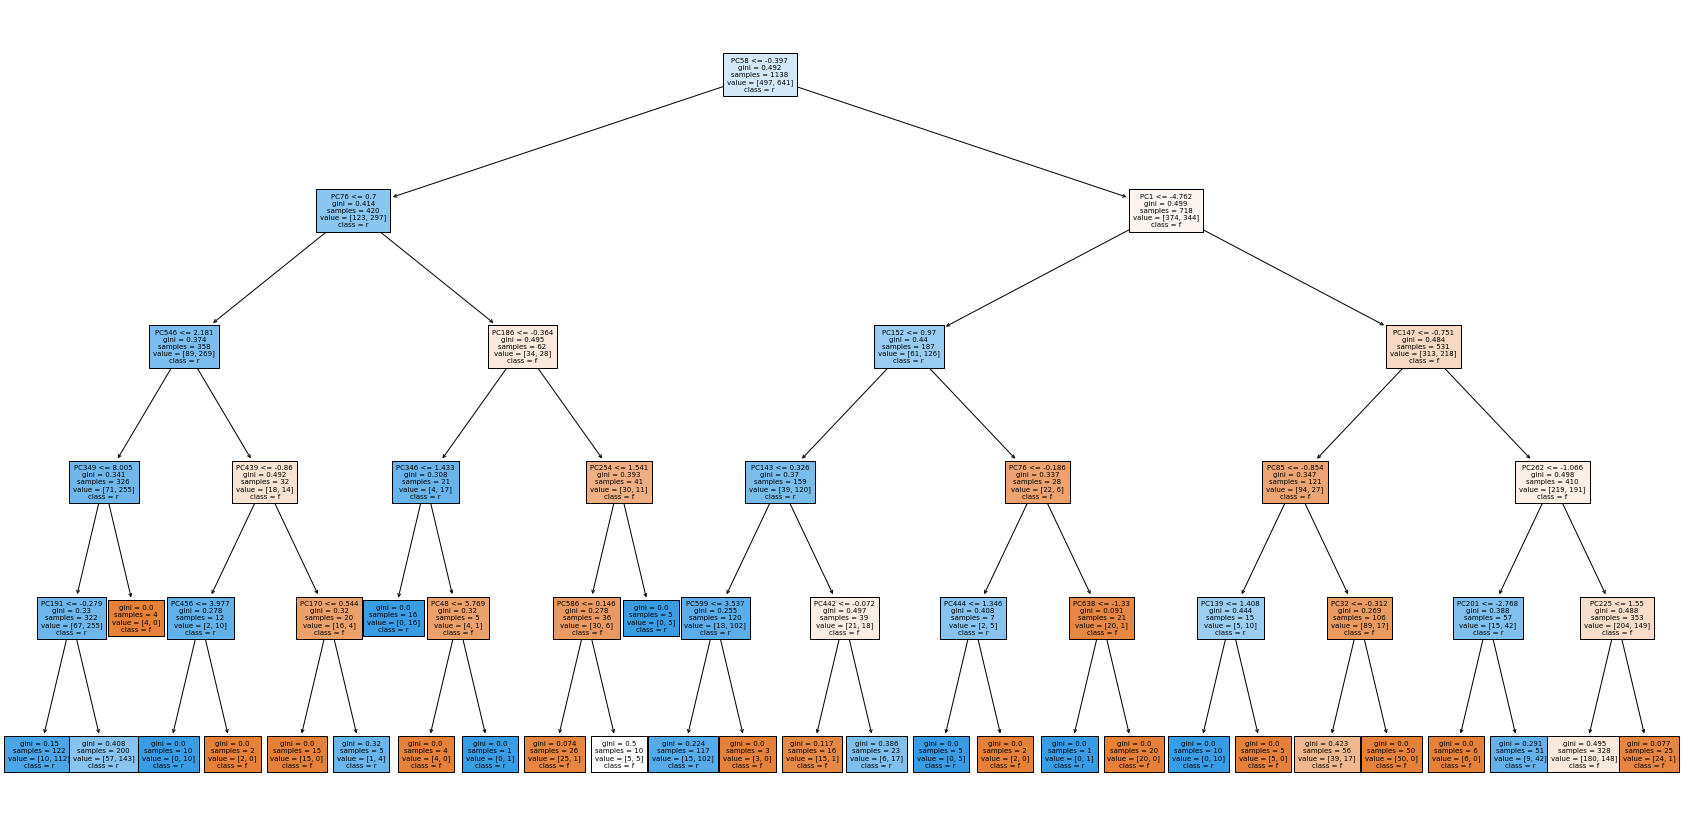

In [13]:
fig, ax = plt.subplots(figsize=(30, 15))
print(f"Profundidad del árbol: {Modelo1.get_depth()}")
print(f"Número de nodos terminales: {Modelo1.get_n_leaves()}")
plot=plot_tree(decision_tree=Modelo1,
              feature_names=x_train.columns,
                filled        = True,
               fontsize      = 7,
              class_names="fraud",
                ax            = ax
              )

### **Predicción y evaluación del modelo**

In [14]:
predicciones_train=Modelo1.predict(X=x_train)
predicciones_train

array([0, 1, 0, ..., 0, 1, 0])

In [15]:
predicciones_test=Modelo1.predict(X=x_test)

In [16]:
# train
metrics.accuracy_score(y_train,predicciones_train)

0.7618629173989455

In [17]:
# test
Accuracy_AD_VS_DD=metrics.accuracy_score(y_test,predicciones_test)
print(Accuracy_AD_VS_DD)

0.6140350877192983


In [18]:
# matrix confusion
metrics.confusion_matrix(y_test,predicciones_test)

array([[ 69,  56],
       [ 54, 106]])

In [19]:
y_test.value_counts()

1    160
0    125
Name: overall_survival, dtype: int64

In [20]:
Reporte_AD_VS_DD=metrics.classification_report(y_test,predicciones_test)

print(Reporte_AD_VS_DD)

              precision    recall  f1-score   support

           0       0.56      0.55      0.56       125
           1       0.65      0.66      0.66       160

    accuracy                           0.61       285
   macro avg       0.61      0.61      0.61       285
weighted avg       0.61      0.61      0.61       285



In [21]:
precision, recall, fscore, support = score(y_test,predicciones_test)
f1_Score_AD_0=fscore[0]
f1_Score_AD_1=fscore[1]
print(f1_Score_AD_0)
print(f1_Score_AD_1)

0.5564516129032259
0.6583850931677019


### **Podando del árbol (pruning)**

**Criterio de costo de complejidad - Cost complexity criterion**

Para encontrar el balance entre la profundidad y complejidad del árbol con respecto a la capacidad predictiva del modelo en datos de test, normalmente se hace crecer el árbol de decisión hasta su mayor extensión y luego se ejecuta el proceso de poda para identificar el subárbol óptimo.

Se encuentra el subárbol óptimo usando el parámetro de costo de complejidad ( 
α
 ) que penaliza la función objetivo abajo para el número de nodos hoja en el árbol (T)
 
 $$
\mathrm{Err}_\alpha(f) = \sum_{t=1}^{T}\mathrm{Err}_t(f)  + \alpha|f|,\quad \alpha\geq 0,
$$

* Para un valor dado de  α se encuentra el árbol podado más pequeño (número de nodos hoja) que tiene el error más bajo de penalización. 
* Se evalúan múltiples moodelos a través de un espectro de   α y se usa validación cruzada para identificar el   α óptimo, y por lo tanto el subárbol óptimo

	* $\alpha\to0\ \: \Rightarrow$ a large tree (i.e. $\alpha=0\Rightarrow f_0$).
	* $\alpha\to\infty\Rightarrow$ a very small tree.

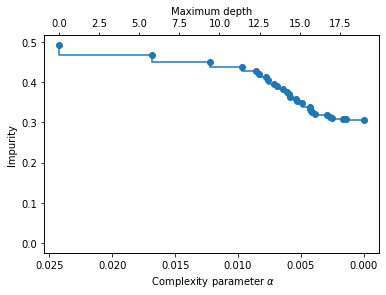

In [22]:
f=Modelo1
f.get_n_leaves() # number of leaves of the tree
f.get_depth()    # depth of the tree

f_alpha = f.cost_complexity_pruning_path(x_train, y_train)
alphas = f_alpha['ccp_alphas']
impurs = f_alpha['impurities']
fs = []
for j in alphas:
    f = DecisionTreeClassifier(ccp_alpha=j, random_state=77)
    f.fit(x_train, y_train)
    fs.append(f)
fs
nodes = []
depth = []
for j in range(0, alphas.shape[0]):
    nodes.append(fs[j].tree_.node_count)
    depth.append(fs[j].tree_.max_depth)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.plot(alphas, impurs, marker='o', drawstyle='steps-post')
ax.invert_xaxis()
plt.xlabel(r' Complexity parameter $\alpha$')
plt.ylabel('Impurity')
ax1 = ax.twiny()
#plt.plot(nodes, alphas, marker='o', drawstyle='steps-post', color='w')
#plt.xlabel('No. of terminal nodes')
plt.plot(depth, alphas, marker='o', drawstyle="steps-post", color='w')
plt.xlabel('Maximum depth')
plt.show()


results = {'alpha': alphas, 'Imputiry': impurs, 'Nodes': nodes, 'Depth': depth}
results = pd.DataFrame(results, columns = ['alpha', 'Imputiry', 'Nodes', 'Depth'])

**Accuracy vs alpha para training y testing**

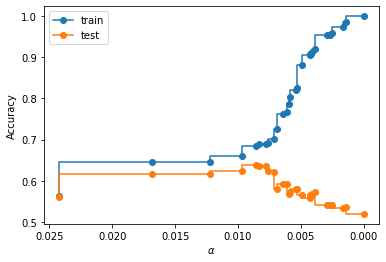

In [23]:
train_scores = [f.score(x_train, y_train) for f in fs]
test_scores  = [f.score(x_test, y_test)   for f in fs]

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel('Accuracy')
#ax.set_title(r'Accuracy vs $\alpha$')
ax.plot(alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(alphas, test_scores,  marker='o', label='test',  drawstyle='steps-post')
ax.invert_xaxis()
ax.legend()
plt.show()

#### **Validacion Cruzada**

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [25]:
f = DecisionTreeClassifier(random_state=77)
max_depth = range(1, 8, 1)
min_samples_leaf = range(1, 10, 1)
param_grid = dict(max_depth = max_depth , min_samples_leaf = min_samples_leaf)
kfold = KFold(n_splits=10, shuffle=False, random_state=None)
grid_search = GridSearchCV(f, param_grid, scoring = 'accuracy', n_jobs = -1, cv = kfold, verbose = 0)
grid_result = grid_search.fit(x_train, y_train)


print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print('%f with: %r' % (mean, param))

Best: 0.619492 using {'max_depth': 2, 'min_samples_leaf': 1}
0.536927 with: {'max_depth': 1, 'min_samples_leaf': 1}
0.536927 with: {'max_depth': 1, 'min_samples_leaf': 2}
0.536927 with: {'max_depth': 1, 'min_samples_leaf': 3}
0.536927 with: {'max_depth': 1, 'min_samples_leaf': 4}
0.536927 with: {'max_depth': 1, 'min_samples_leaf': 5}
0.536927 with: {'max_depth': 1, 'min_samples_leaf': 6}
0.536927 with: {'max_depth': 1, 'min_samples_leaf': 7}
0.536927 with: {'max_depth': 1, 'min_samples_leaf': 8}
0.536927 with: {'max_depth': 1, 'min_samples_leaf': 9}
0.619492 with: {'max_depth': 2, 'min_samples_leaf': 1}
0.619492 with: {'max_depth': 2, 'min_samples_leaf': 2}
0.619492 with: {'max_depth': 2, 'min_samples_leaf': 3}
0.619492 with: {'max_depth': 2, 'min_samples_leaf': 4}
0.619492 with: {'max_depth': 2, 'min_samples_leaf': 5}
0.619492 with: {'max_depth': 2, 'min_samples_leaf': 6}
0.619492 with: {'max_depth': 2, 'min_samples_leaf': 7}
0.619492 with: {'max_depth': 2, 'min_samples_leaf': 8}
0.61

**Pruned tree**

In [26]:
f = DecisionTreeClassifier(
                           criterion='gini',    # 'gini' or 'entropy' impurity functions
                          max_depth=7,         # maximum depth of the tree
#                          min_samples_split=2, # minimum number of samples required to split an internal node
#                          min_samples_leaf=1,  # minimum number of samples required to be at a leaf node
                           ccp_alpha=0.000,
                           random_state=77
                          )

f = f.fit(x_train, y_train)

print(f)
print('Depth:', f.get_depth())            # depth of the tree
print('No. of leaves:', f.get_n_leaves()) # number of leaves of the tree

# rules of the decision tree
feature_names = list(x_train.columns) # features' names to plot the tree
ft = export_text(f, feature_names=feature_names)
#print(ft)

DecisionTreeClassifier(max_depth=7, random_state=77)
Depth: 7
No. of leaves: 54


**Tree plot**

Profundidad del árbol: 7
Número de nodos terminales: 54


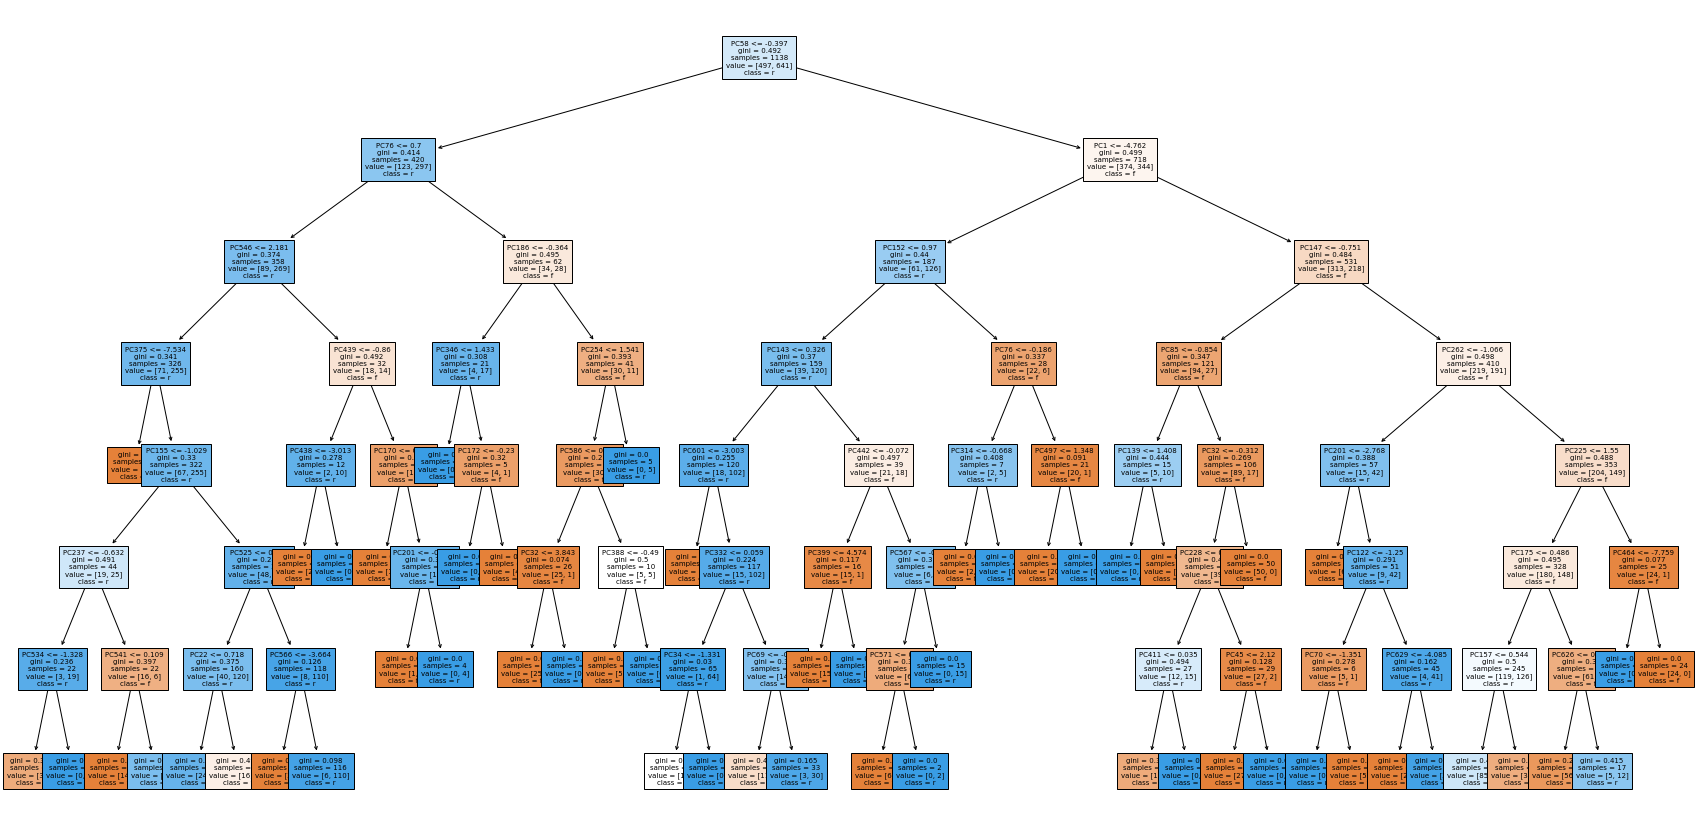

In [27]:
ig, ax = plt.subplots(figsize=(30, 15))
print(f"Profundidad del árbol: {f.get_depth()}")
print(f"Número de nodos terminales: {f.get_n_leaves()}")
plot=plot_tree(decision_tree=f,
              feature_names=x_train.columns,
                filled        = True,
               fontsize      = 7,
              class_names="fraud",
                ax            = ax
              )

**Evaluamos Prediccion**

In [28]:
predicciones_train=f.predict(X=x_train)
predicciones_train

array([1, 1, 0, ..., 1, 1, 0])

In [29]:
predicciones_test=f.predict(X=x_test)
predicciones_test

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1])

In [30]:
Accuray_train_Optimo=metrics.accuracy_score(y_train,predicciones_train)
Accuray_test_Optimo=metrics.accuracy_score(y_test,predicciones_test)
print(Accuray_train_Optimo)
print(Accuray_test_Optimo)

0.844463971880492
0.543859649122807


In [31]:
precision, recall, fscore, support = score(y_test,predicciones_test)
f1_Score_AD1_0=fscore[0]
f1_Score_AD1_1=fscore[1]

In [32]:
Reporte_AD_Optimo=metrics.classification_report(y_test,predicciones_test)
print(Reporte_AD_Optimo)

              precision    recall  f1-score   support

           0       0.47      0.35      0.40       125
           1       0.58      0.69      0.63       160

    accuracy                           0.54       285
   macro avg       0.53      0.52      0.52       285
weighted avg       0.53      0.54      0.53       285



In [33]:
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")

importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': f.feature_importances_}
                            )
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
57,PC58,0.084731
0,PC1,0.058933
75,PC76,0.043552
151,PC152,0.042757
146,PC147,0.033843
...,...,...
231,PC232,0.000000
232,PC233,0.000000
233,PC234,0.000000
234,PC235,0.000000


## **4.2) Random Forest**

El término ensamblador significa grupo. Los métodos tipo ensamblador están formados de un grupo de modelos predictivos que permiten alcanzar una mejor precisión y estabilidad del modelo. Estos proveen una mejora significativa a los modelos de árboles de decisión.

¿Por qué surgen los ensambladores de árboles?

* Así como todos los modelos, un árbol de decisión también sufre de los problemas de sesgo y varianza. Es decir, ‘cuánto en promedio son los valores predecidos diferentes de los valores reales’ (sesgo) y ‘cuan diferentes serán las predicciones de un modelo en un mismo punto si muestras diferentes se tomaran de la misma población’ (varianza).

* Al construir un árbol pequeño se obtendrá un modelo con baja varianza y alto sesgo. Normalmente, al incrementar la complejidad del modelo, se verá una reducción en el error de predicción debido a un sesgo más bajo en el modelo. En un punto el modelo será muy complejo y se producirá un sobre-ajuste del modelo el cual empezará a sufrir de varianza alta.

* El modelo óptimo debería mantener un balance entre estos dos tipos de errores. A esto se le conoce como “trade-off” (equilibrio) entre errores de sesgo y varianza. El uso de ensambladores es una forma de aplicar este “trade-off”.

<img src="https://bookdown.org/content/2031/images/trade_off.jpg" width=500>

* Ensambladores comunes: Bagging, Boosting and Stacking. Random Forest es del primer tipo

**¿Qué es el proceso de bagging y cómo funciona?**

Bagging es una técnica usada para reducir la varianza de las predicciones a través de la combinación de los resultados de varios clasificadores, cada uno de ellos modelados con diferentes subconjuntos tomados de la misma población.

<img src="https://bookdown.org/content/2031/images/bootstraping.png" width=500>


**En resumen:**
* Crear múltiples subconjuntos de datos
* Construir múltiples modelos
* Combinar los modelos.

**Random Forest**

Random Forest se considera como la “panacea” en todos los problemas de ciencia de datos.
Util para regresión y clasificación.
Un grupo de modelos “débiles”, se combinan en un modelo robusto.
Sirve como una técnica para reducción de la dimensionalidad.
Se generan múltiples árboles (a diferencia de CART).
Cada árbol da una classificación (vota por una clase). Y el resultado es la clase con mayor número de votos en todo el bosque (forest).
Para regresión, se toma el promedio de las salidas (predicciones) de todos los árboles.

**¿Cómo se construye un modelo random forest?**

Cada árbol se construye así:

* Dado que el número de casos en el conjunto de entrenamiento es N. Una muestra de esos N casos se toma aleatoriamente pero CON REEMPLAZO. Esta muestra será el conjunto de entrenamiento para construir el árbol i.

* Si existen M varibles de entrada, un número m<M se especifica tal que para cada nodo, m variables se seleccionan aleatoriamente de M. La mejor división de estos m atributos es usado para ramificar el árbol. El valor m se mantiene constante durante la generación de todo el bosque.

* Cada árbol crece hasta su máxima extensión posible y NO hay proceso de poda.
Nuevas instancias se predicen a partir de la agregación de las predicciones de los x árboles (i.e., mayoría de votos para clasificación, promedio para regresión)


**Out of bag samples y out of bag error**

* El proceso de muestreo de los datos con reemplazo se denomina bootstrap.
* Un tercio de los datos no se usan para el entrenamiento y pueden ser usados para test.
* Este conjunto se denomina out of bag (OOB )samples.

<img src="https://bookdown.org/content/2031/images/bootstrap_concept.png" width=500>

* El error estimado en estos out of bag samples se conoce como out of bag error (OOB error)
* Usar este conjunto de test (OOB) es tan preciso como si se usara un conjunto de test del mismo tamaño que el de entrenamiento.
* Sería posible no usar un conjunto de test adicional


<img src="https://bookdown.org/content/2031/images/OOB_diagram.png" width=500>

**Ventajas de Random Forest**

* Existen muy pocas suposiciones y por lo tanto la preparación de los datos es mínima.
* Puede manejar hasta miles de variables de entrada e identificar las más significativas. Método de reducción de dimensionalidad.
* Una de las salidas del modelo es la importancia de variables.
* Incorpora métodos efectivos para estimar valores faltantes.
* Es posible usarlo como método no supervisado (clustering) y detección de outliers.

**Desventajas de Random Forest**

* Pérdida de interpretación
* Bueno para clasificación, no tanto para regresión. Las predicciones no son de naturaleza continua.
* En regresión, no puede predecir más allá del rango de valores del conjunto de entrenamiento.
* Poco control en lo que hace el modelo (modelo caja negra para modeladores estadísticos)

In [34]:
from sklearn.ensemble import RandomForestClassifier

f = RandomForestClassifier(
                           criterion='gini',    # 'entropy'
                           max_depth=None,      # maximum depth of the tree
                           min_samples_split=3, # minimum number of samples required to split an internal node
                           min_samples_leaf=1,  # minimum number of samples required to be at a leaf node
                           max_leaf_nodes=None,
                           #
                           n_estimators=100, ################################### Cuantos Arboles?
                           max_features='auto', # 'auto', then max_features=sqrt(n_features)
                           bootstrap=True,
                           oob_score=False,
                           random_state=77
                           )

f = f.fit(x_train, y_train)
f

RandomForestClassifier(min_samples_split=3, random_state=77)

**Evaluación del Modelo**

In [35]:
predicciones_train=f.predict(X=x_train)
predicciones_test=f.predict(X=x_test)

Accuray_train_RF=metrics.accuracy_score(y_train,predicciones_train)
Accuray_test_RF=metrics.accuracy_score(y_test,predicciones_test)
print(Accuray_train_RF)
print(Accuray_test_RF)

1.0
0.631578947368421


In [36]:
Reporte_RF=metrics.classification_report(y_test,predicciones_test)
print(Reporte_RF)

              precision    recall  f1-score   support

           0       0.60      0.46      0.52       125
           1       0.65      0.76      0.70       160

    accuracy                           0.63       285
   macro avg       0.62      0.61      0.61       285
weighted avg       0.63      0.63      0.62       285



In [37]:
precision, recall, fscore, support = score(y_test,predicciones_test)
f1_Score_RF_0=fscore[0]
f1_Score_RF_1=fscore[1]
print(f1_Score_RF_0)
print(f1_Score_RF_1)

0.5248868778280542
0.6991404011461319


### **Optimización de Hiperparametros**

In [38]:
from sklearn.model_selection import GridSearchCV, KFold

# define grid search
B = 10 # Costo computacional, recomiendo mas 50
b = range(1, B + 1)


grid = dict(n_estimators=b)
kfold = KFold(n_splits=5, shuffle=False, random_state=None)
grid_search = GridSearchCV(estimator=f, param_grid=grid, n_jobs=-1, cv=kfold, scoring='accuracy')
grid_result = grid_search.fit(x_train, y_train)



# summarize results
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print('%f with: %r' % (mean, param))

Best: 0.602751 using {'n_estimators': 10}
0.526385 with: {'n_estimators': 1}
0.507045 with: {'n_estimators': 2}
0.575543 with: {'n_estimators': 3}
0.549192 with: {'n_estimators': 4}
0.557960 with: {'n_estimators': 5}
0.557960 with: {'n_estimators': 6}
0.578124 with: {'n_estimators': 7}
0.576378 with: {'n_estimators': 8}
0.589555 with: {'n_estimators': 9}
0.602751 with: {'n_estimators': 10}


In [39]:
from sklearn.ensemble import RandomForestClassifier

f = RandomForestClassifier(
                           criterion='gini',    # 'entropy'
                           max_depth=None,      # maximum depth of the tree
                           min_samples_split=3, # minimum number of samples required to split an internal node
                           min_samples_leaf=1,  # minimum number of samples required to be at a leaf node
                           #                       
                           n_estimators=6,
                           max_features='auto', # 'auto', then max_features=sqrt(n_features)
                           bootstrap=True,
                           oob_score=True,
                           random_state=77
                          )

oob_error   = []
train_error = []
test_error  = []
for b in range(1, B + 1):
    f.set_params(n_estimators = b)
    f.fit(x_train, y_train)
    # errors
    oob_error.append(1 - f.oob_score_)
    train_error.append(1 - f.score(x_train, y_train))
    test_error.append(1 - f.score(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. Thi

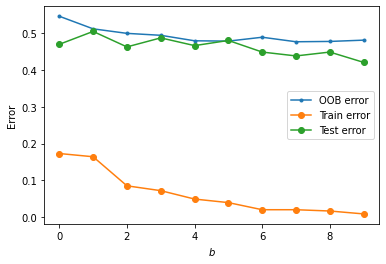

In [40]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_xlabel(r'$b$')
ax.set_ylabel('Error')
ax.plot(oob_error, marker='.', label='OOB error')
ax.plot(train_error, marker='o', label='Train error')
ax.plot(test_error, marker='o', label='Test error')
ax.legend()
plt.show()

**Random Forest Optimo**

In [41]:
import numpy as np

f = RandomForestClassifier(
                           criterion='gini',    # 'entropy'
                           max_depth=None,      # maximum depth of the tree
                           min_samples_split=6, # minimum number of samples required to split an internal node
                           min_samples_leaf=1,  # minimum number of samples required to be at a leaf node
                           max_leaf_nodes=None,
                           #                       
                           n_estimators=6,
                           max_features='auto', # 'auto', then max_features=sqrt(n_features)
                           bootstrap=True,
                           oob_score=False,
                           random_state=77
                          )

f = f.fit(x_train, y_train)

In [42]:
# ------------------------------------------------------------------------------
modelo_final = f   #grid_result.best_estimator_
modelo_final 

RandomForestClassifier(min_samples_split=6, n_estimators=6, random_state=77)

In [43]:
predicciones_train=modelo_final.predict(X=x_train)
predicciones_test=modelo_final.predict(X=x_test)

Accuray_train_RF_O=metrics.accuracy_score(y_train,predicciones_train)
Accuray_test_RF_O=metrics.accuracy_score(y_test,predicciones_test)
print(Accuray_train_RF_O)
print(Accuray_test_RF_O)

0.961335676625659
0.5614035087719298


In [44]:
Reporte_RF_O=metrics.classification_report(y_test,predicciones_test)
print(Reporte_RF_O)

              precision    recall  f1-score   support

           0       0.50      0.56      0.53       125
           1       0.62      0.56      0.59       160

    accuracy                           0.56       285
   macro avg       0.56      0.56      0.56       285
weighted avg       0.57      0.56      0.56       285



In [45]:
precision, recall, fscore, support = score(y_test,predicciones_test)
f1_Score_RF1_0=fscore[0]
f1_Score_RF1_1=fscore[1]
print(f1_Score_RF1_0)
print(f1_Score_RF1_1)

0.5283018867924528
0.5901639344262296


**Importancia de Variables**

PC7      0.017232
PC95     0.014965
PC124    0.010402
PC398    0.009412
PC2      0.008624
PC185    0.008384
PC395    0.008203
PC209    0.007999
PC218    0.007614
PC39     0.007608
PC80     0.007493
PC50     0.007185
PC54     0.007051
PC642    0.006784
PC32     0.006495
dtype: float64


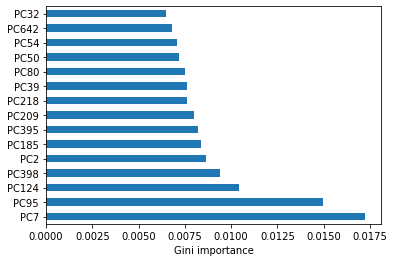

In [46]:
import matplotlib.pyplot as plt

feat_importances = pd.Series(modelo_final.feature_importances_, index=x_train.columns)

feat_importances = feat_importances.sort_values(ascending=False)
print(feat_importances.head(15))

feat_importances.nlargest(15).plot(kind='barh', color='#1f77b4')
plt.xlabel('Gini importance')
#plt.ylabel('Feature')
plt.show()

## **4.3) Boosting**

### **A) Gradient Boosting**


Un modelo Gradient Boosting está formado por un conjunto de árboles de decisión individuales, entrenados de forma secuencial, de forma que cada nuevo árbol trata de mejorar los errores de los árboles anteriores. La predicción de una nueva observación se obtiene agregando las predicciones de todos los árboles individuales que forman el modelo.

Ventajas

Son capaces de seleccionar predictores de forma automática.

Pueden aplicarse a problemas de regresión y clasificación.

Los árboles pueden, en teoría, manejar tanto predictores numéricos como categóricos sin tener que crear variables dummy o one-hot-encoding. En la práctica, esto depende de la implementación del algoritmo que tenga cada librería.

Al tratarse de métodos no paramétricos, no es necesario que se cumpla ningún tipo de distribución específica.

Por lo general, requieren mucha menos limpieza y pre procesado de los datos en comparación a otros métodos de aprendizaje estadístico (por ejemplo, no requieren estandarización).

No se ven muy influenciados por outliers.

Si para alguna observación, el valor de un predictor no está disponible, a pesar de no poder llegar a ningún nodo terminal, se puede conseguir una predicción empleando todas las observaciones que pertenecen al último nodo alcanzado. La precisión de la predicción se verá reducida pero al menos podrá obtenerse.

Son muy útiles en la exploración de datos, permiten identificar de forma rápida y eficiente las variables (predictores) más importantes.

Tienen buena escalabilidad, pueden aplicarse a conjuntos de datos con un elevado número de observaciones.

Desventajas

Al combinar múltiples árboles, se pierde la interpretabilidad que tienen los modelos basados en un único árbol.

Cuando tratan con predictores continuos, pierden parte de su información al categorizarlas en el momento de la división de los nodos.

Tal y como se describe más adelante, la creación de las ramificaciones de los árboles se consigue mediante el algoritmo de recursive binary splitting. Este algoritmo identifica y evalúa las posibles divisiones de cada predictor acorde a una determinada medida (RSS, Gini, entropía…). Los predictores continuos o predictores cualitativos con muchos niveles tienen mayor probabilidad de contener, solo por azar, algún punto de corte óptimo, por lo que suelen verse favorecidos en la creación de los árboles.

No son capaces de extrapolar fuera del rango de los predictores observado en los datos de entrenamiento.

**A) Modelo Gradient Boosting**
* Es un método de machine learning de mayor éxito.

* Gradient boosting with a $\ell_2$ loss function is known as $\ell_2$Boost
* Gradient boosting with a log-loss function is known as LogitBoost
* Gradient boosting with a exp-loss function is known as AdaBoost

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
Modelo_GBC=GradientBoostingClassifier( max_depth=7,
                                      loss="deviance",
                                      n_estimators=20, # Recomiendo
                                      learning_rate=1.0,
                                      random_state=77# semilla 
                                     )

Modelo_GBC.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=7, n_estimators=20,
                           random_state=77)

**Poder de Prediccion**

In [48]:
predicciones_train=Modelo_GBC.predict(X=x_train)
predicciones_test=Modelo_GBC.predict(X=x_test)
Accuray_train_GBC=metrics.accuracy_score(y_train,predicciones_train)
Accuray_test_GBC=metrics.accuracy_score(y_test,predicciones_test)
print(Accuray_train_GBC)
print(Accuray_test_GBC)

1.0
0.6


In [49]:
Reporte_GBC_O=metrics.classification_report(y_test,predicciones_test)
print(Reporte_GBC_O)

              precision    recall  f1-score   support

           0       0.56      0.44      0.49       125
           1       0.62      0.72      0.67       160

    accuracy                           0.60       285
   macro avg       0.59      0.58      0.58       285
weighted avg       0.59      0.60      0.59       285



In [50]:
precision, recall, fscore, support = score(y_test,predicciones_test)
f1_Score_B_0=fscore[0]
f1_Score_B_1=fscore[1]
print(f1_Score_B_0)
print(f1_Score_B_1)

0.4910714285714286
0.6705202312138728



## **4.4) Logit (Inferencia)**

**Modelo lineal generalizado**

En estadística, el modelo lineal generalizado (GLM) es una generalización flexible de la regresión lineal ordinaria que permite variables de respuesta que tienen modelos de distribución de errores distintos de una distribución normal. El GLM generaliza la regresión lineal al permitir que el modelo lineal esté relacionado con la variable de respuesta a través de una función de enlace y al permitir que la magnitud de la varianza de cada medición sea una función de su valor predicho.

John Nelder y Robert Wedderburn formularon modelos lineales generalizados como una forma de unificar otros modelos estadísticos, como la regresión lineal, la regresión logística y la regresión de Poisson. Propusieron un método de mínimos cuadrados iterativamente ponderados para la estimación de máxima verosimilitud de los parámetros del modelo. La estimación de máxima verosimilitud sigue siendo popular y es el método predeterminado en muchos paquetes de computación estadística


In [51]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2,random_state=1234,stratify=Y)

In [52]:
import statsmodels.api as sm # statsmodels Seres Tiempo
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind

In [53]:
x_train_1=sm.add_constant(x_train,prepend=True)
x_test_1=sm.add_constant(x_test,prepend=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**Modelo Logit**

In [54]:
Modelo_Logit=sm.Logit(endog=y_train,exog=x_train_1)

**Selección de Variables**

Selección univariante Las pruebas estadísticas se pueden utilizar para seleccionar aquellas características que tienen la relación más fuerte con la variable de salida. La biblioteca scikit-learn proporciona la clase SelectKBest que se puede usar con un conjunto de diferentes pruebas estadísticas para seleccionar un número específico de características.

In [55]:
(x_train.shape)

(1138, 650)

In [56]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif

In [57]:
pd.set_option('display.float_format','{:.2f}'.format)
Mejores_Variables=SelectKBest(score_func=mutual_info_classif,k=650)
fit=Mejores_Variables.fit(x_train,y_train)
df_puntajes=pd.DataFrame(fit.scores_)
df_Columnas=pd.DataFrame(x_train.columns)
df_completo=pd.concat([df_Columnas,df_puntajes],axis=1)
df_completo.columns=["Variable","Puntaje"]
#################################################### Seleccion 10 Variables ######################
td=df_completo.nlargest(10,"Puntaje")
td

,Variable,Puntaje
306,PC307,0.05
199,PC200,0.04
155,PC156,0.04
231,PC232,0.04
170,PC171,0.04
0,PC1,0.04
246,PC247,0.04
517,PC518,0.04
156,PC157,0.03
228,PC229,0.03


In [58]:
Variables=td["Variable"].values
Variables

array(['PC307', 'PC200', 'PC156', 'PC232', 'PC171', 'PC1', 'PC247',
       'PC518', 'PC157', 'PC229'], dtype=object)

In [59]:
x_train_Seleccion_V=x_train[Variables]
x_test_Seleccion_V=x_test[Variables]

In [60]:
x_train_1=sm.add_constant(x_train_Seleccion_V,prepend=True)
x_test_1=sm.add_constant(x_test_Seleccion_V,prepend=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [61]:
Modelo_Logit=sm.Logit(endog=y_train,exog=x_train_1)
Modelo_Logit=Modelo_Logit.fit()# method='bfgs

Optimization terminated successfully.
         Current function value: 0.673108
         Iterations 4


In [62]:
print(Modelo_Logit.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.018    
Dependent Variable: overall_survival AIC:              1553.9928
Date:               2022-04-25 21:45 BIC:              1609.4001
No. Observations:   1138             Log-Likelihood:   -766.00  
Df Model:           10               LL-Null:          -779.67  
Df Residuals:       1127             LLR p-value:      0.0023005
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     4.0000                                      
------------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
------------------------------------------------------------------
const     0.2649     0.0606    4.3687   0.0000    0.1461    0.3838
PC307     0.0255     0.0249    1.0229   0.3064   -0.0234    0.0744
PC200    -0.0146     0.0238   -0.6158   0.5380   -0.0612    0.0319
PC156    -0.0138     0.0206   -0.6678 

**Evaluación**

In [63]:
Probabilidad_test=Modelo_Logit.predict(exog=x_test_1)
Predicciones_test=np.where(Probabilidad_test < 0.5,0,1)
Accuracy_Log_test=metrics.accuracy_score(y_test,Predicciones_test)
print(Accuracy_Log_test)
Reporte_Log_test=metrics.classification_report(y_test,Predicciones_test)
print(Reporte_Log_test)
precision, recall, fscore, support = score(y_test,Predicciones_test)
f1_Score_Log1_0=fscore[0]
f1_Score_Log1_1=fscore[1]
print(f1_Score_Log1_0)
print(f1_Score_Log1_1)

0.5614035087719298
              precision    recall  f1-score   support

           0       0.50      0.20      0.29       125
           1       0.57      0.84      0.68       160

    accuracy                           0.56       285
   macro avg       0.54      0.52      0.48       285
weighted avg       0.54      0.56      0.51       285

0.28571428571428575
0.6835443037974684


# **5) Evaluación de Modelos**

In [64]:
df_comparacion_Modelos=pd.DataFrame({
    "Modelos":["Árbol de decisión","Arbol Optimizado","RandomForest","RandomForestOptimo","GradientBoosting","RegresionLogistica"],
    "Accuracy":[Accuracy_AD_VS_DD,Accuray_test_Optimo,Accuray_test_RF,Accuray_test_RF_O,Accuray_test_GBC,Accuracy_Log_test],
    "f1_0":[f1_Score_AD_0,f1_Score_AD1_0,f1_Score_RF_0,f1_Score_RF1_0,f1_Score_B_0,f1_Score_Log1_0],
    "f1_1":[f1_Score_AD_1,f1_Score_AD1_1,f1_Score_RF_1,f1_Score_RF1_1,f1_Score_B_1,f1_Score_Log1_1]})
df_comparacion_Modelos.sort_values("Accuracy",ascending=False)

,Modelos,Accuracy,f1_0,f1_1
2,RandomForest,0.63,0.52,0.70
0,Árbol de decisión,0.61,0.56,0.66
4,GradientBoosting,0.60,0.49,0.67
3,RandomForestOptimo,0.56,0.53,0.59
5,RegresionLogistica,0.56,0.29,0.68
1,Arbol Optimizado,0.54,0.40,0.63


* El mejor modelo es RandomForest